# Common Univariate Random Variables

There are named random variable distributions in excess of 200. Each of these are developed and named to express real world data based obsertations in order to enable description of the randomness observed regarding the behaviour. This chapter focuses on the named random variables that are commonly utilized in the Financial space.

Risk Managers model uncertainty in many shapes and forms both with discrete and continous random variables.

**The key discrete random variables are:**

**- The "Bernoulli" - Which was touched uppon in CH2**

A general purpouse distribution that is typically used to model binary events, like defaults.

**- The Binomial**

Describes the sum of $n$ independent Bernoulli random variables. 

**- And the Poisson**

Commonly used to model Hazard Rates, which is the count of the number of events that occur in a fixed unit of time / observartions. For example think about the number of corporations that default in a quarter.


There is a wider variety of continous distibutions used by risk managers to model uncertainty persay. 

**- The most basic is a uniform distribution, which serves as a foundation for all random variables.**

**- The most widely used distribution is the well known Gaussean / Normal distribution, which is usually utilized for modelling returns, and for statistical tests**

**- Many other build uppon the Gaussean with slights twists like Student's t, the Chi - Square, and the F, which can be encountered in case of evaluation of statistical models**

## Discrete Random Variables

### Bernoulli 

Been toroughly touched uppon in CH2. 

### Binomial

A binomial random variable measures the total number of successes from $n$ independent Bernoully random variables, where each has a probability of success equal to $p$. In other words, binomial distributions are used to model counts of independent events.

A binomial distribution has 2 parameters:

1. $n$, the number of independent events, and
2. $p$, the probability of each experiment that's successful

If $n$ variables $X_i$ ~ $Bernoulli(p)$ are indepentent, then a binomial with parameters $n$ and $p$ is defined as $$
Y = \sum_{i=1}^n X_i,
$$
$\text{where } Y \sim \text{Binomial}(n, p)$, or $B(n, p)$.


In [1]:
import random
def Bernoulli(p):
    """Simulate a Bernoulli trial with success probability p."""
    return 1 if random.random() < p else 0

    
def B(n, p):
    """Simulate a Binomial random variable as the sum of n independent Bernoulli trials."""
    Y = 0
    for _ in range(n):
        Y += Bernoulli(p)   # Sum of n Bernoulli(p) variables, note that basically we just 
    return Y                # Wrapped Bernoulli which gives 0, or 1 to a function that does the 
                            # Experiment n times, and outs the sum of successful experiments!
                            # Above text indirectly implied how to program this mate
    

p: float  = 0.4             # Probability of successful experiment: 40%
n: float  = 100             # Trials
count:int = B(n, p)         # Of succesful experiments
print(f"Utilizing random's random.() method after {n} INDEPENDENT experiment with")
print(f"an individual success probability of {p*100}% we got {count} successful experiments")

Utilizing random's random.() method after 100 INDEPENDENT experiment with
an individual success probability of 40.0% we got 38 successful experiments


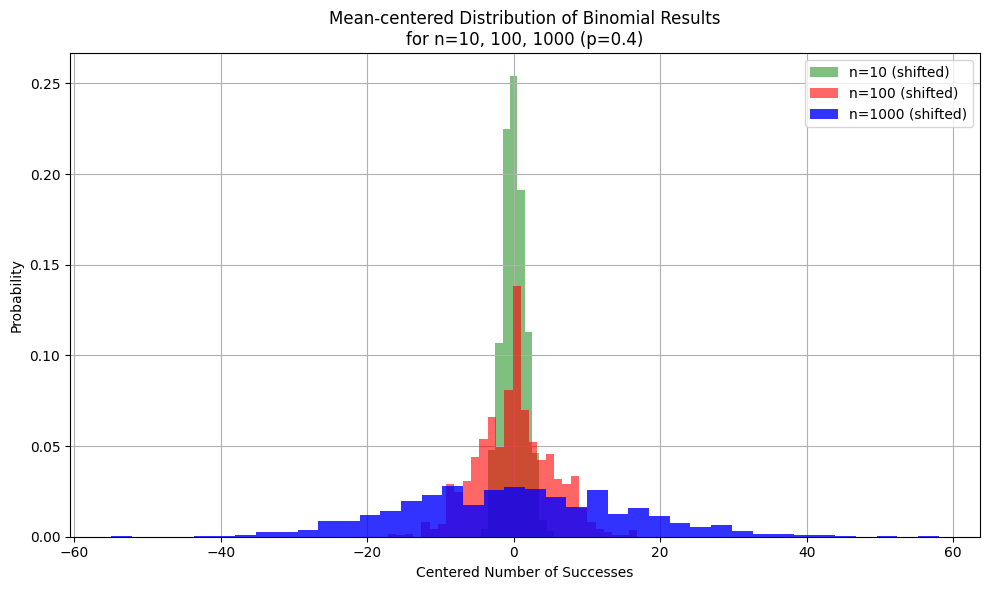

In [2]:
# Ok let's play with this! 
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
n_1 = 10
n_2 = 100
n_3 = 1000
simulations = 1000

# Simulate results
n_1_results = [B(n_1, p) for _ in range(simulations)]
n_2_results = [B(n_2, p) for _ in range(simulations)]
n_3_results = [B(n_3, p) for _ in range(simulations)]

# Mean-center ("shift") so that all three distributions peak at zero
n_1_results_shifted = [x - np.mean(n_1_results) for x in n_1_results]
n_2_results_shifted = [x - np.mean(n_2_results) for x in n_2_results]
n_3_results_shifted = [x - np.mean(n_3_results) for x in n_3_results]

# Plotting
plt.figure(figsize=(10,6))

# Plot green at back
plt.hist(n_1_results_shifted, bins=np.arange(min(n_1_results_shifted), max(n_1_results_shifted)+2)-0.5,
         alpha=0.5, color='green', density=True, label=f'n={n_1} (shifted)', zorder=1)

# Plot red in middle
plt.hist(n_2_results_shifted, bins=30,
         alpha=0.6, color='red', density=True, label=f'n={n_2} (shifted)', zorder=2)

# Plot blue on top
plt.hist(n_3_results_shifted, bins=40,
         alpha=0.8, color='blue', density=True, label=f'n={n_3} (shifted)', zorder=3)

plt.xlabel('Centered Number of Successes')
plt.ylabel('Probability')
plt.title('Mean-centered Distribution of Binomial Results\nfor n=10, 100, 1000 (p=0.4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Note that as n increases the spread of values as well. The variance increases linearly -> stddev / spread roughly by
# sqrt(n increment)

Okay, so what we see here? What I wanted to demonstrate is: 

(1) Touching back to prev chapter's statement that skewness is being a lot of times misunderstood as peakyness. On the contraty here all 3 distros are emergent from the same function, and probability, while the only thing we changed are the number of experiments! Thus, the nominal standard decviation (variance...) increases, but comparatively to $n$ roughly they remain the same. But since we have to pick a scaleing for X-axis, the peakyness changes, since there is a broader range $X$ is being displayed on than the realistic PMF, or actually observed realized density distributions in this instance, so while all 3 distributions are being similarly skewed, we happen to see wildly different peakyness on the chart for them!

(2) As the number of trials n grows larger, the Binomial distribution tends to approximate a Normal distribution according to the Central Limit Theorem, especially when mean-centering and scaling. This is why your histogram plots with increasing n look more symmetric and bell-shaped centered around the mean!

I highly recomment 3Bron1Blue's CLT video: https://www.youtube.com/watch?v=zeJD6dqJ5lo

So the mean ($E[Y]$) follows directly from the properities of moments described in CH2:$$E[Y] = \sum_{i=1}^{n} p = p + p + p + \cdots + p = n \cdot p$$
Interpret as if a random process' $E[X]$ = p; and we repeat n times, than $E[Y]$ <- the expected value of a random process repeated n times is p * n.

Meanwhile the variance of $Y$ ($V[Y]$) is:$$V[Y] = n \cdot p \cdot (1-p)$$
It scales linearly with n as well! But the actual dispersion persay (sigma) does with a factor of sqrt(n)! Mind you the CLT.

Note that if you run a random function based practical experimentation the EXPECTED mean and varianve is expressed as per above, but the actual realized values may differ! 

In [3]:
def E_Y (n, p):
    return n * p #E[Y]
def V_Y (n, p):
    return n * p * (1-p) #V[Y]


from scipy.stats import skew, kurtosis
import numpy as np

def descriptive_stats(data, label, n, p=0.4):
    mean_val = np.mean(data)
    var_val = np.var(data)
    skew_val = skew(data)
    kurt_val = kurtosis(data)    # Returns excess kurtosis
    E_Y_n = E_Y(n, p)
    V_Y_n = V_Y(n, p)
    print(f"{label} statistics:")
    print(f"  Mean: {mean_val:.4f}")
    print(f"  E[Y]: {E_Y_n:.4f}")
    print(f"  Variance: {var_val:.4f}")
    print(f"  V[Y]: {V_Y_n:.4f}")
    print(f"  Skewness: {skew_val:.4f}")
    print(f"  Excess Kurtosis: {kurt_val:.4f}\n")

# Then call the function like this:
descriptive_stats(n_1_results, "p=0.4 n=10 results", n_1)
descriptive_stats(n_2_results, "p=0.4 n=100 results", n_2)
descriptive_stats(n_3_results, "p=0.4 n=1000 results", n_3)


p=0.4 n=10 results statistics:
  Mean: 4.0070
  E[Y]: 4.0000
  Variance: 2.4250
  V[Y]: 2.4000
  Skewness: 0.1600
  Excess Kurtosis: -0.1540

p=0.4 n=100 results statistics:
  Mean: 40.1600
  E[Y]: 40.0000
  Variance: 26.1064
  V[Y]: 24.0000
  Skewness: 0.0788
  Excess Kurtosis: 0.1983

p=0.4 n=1000 results statistics:
  Mean: 399.9590
  E[Y]: 400.0000
  Variance: 231.9073
  V[Y]: 240.0000
  Skewness: 0.1565
  Excess Kurtosis: 0.0754



Note that the mean and variance for Binomial are simply the mean and varianve of Bernoulli multiplied by $n$, meaning that $E[Y]$ and $V[Y]$ scale linearly with $n$, since each of the "experiments" are independent. The $p(1-p)$ component reflects the uncertainty coming from the Bernoulli random variables, while $n$ considers the number of independent component variables.

By conclusion, a binomial random variable is always non-negative, integer-valued, and a $B(n, p)$ is always lwss than or equal to $n$ -- equal in case of $p = 1.00$.

The skewness of a binomial depends on $p$, with small values produce right skewed distributions. The PMF of a $B(n, p)$ is:
$$f_Y(y) = \binom{n}{y} p^y (1 - p)^{n - y}$$

Note that $\binom{n}{y}$ is commonly expressed as "n choose y", which counts the number of distinct ways that $y$ successes could have been realized from $n$ experiments. It is equivalent to:$$ \binom{n}{y} = \frac{n!}{y!(n-y)!}$$ Where "!" indicates the factorial.



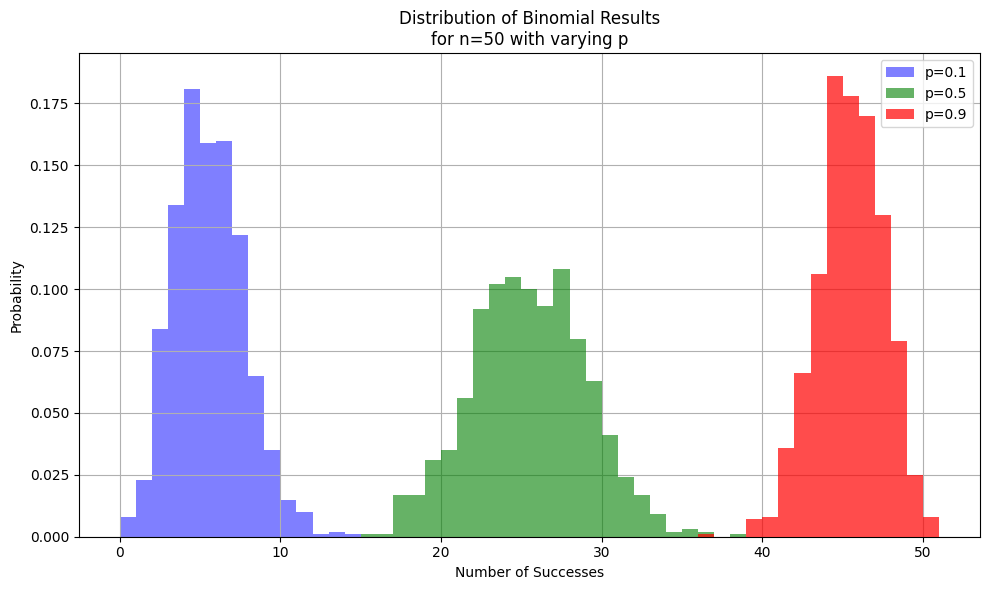

p=0.1 n=50 results statistics:
  Mean: 5.0730
  E[Y]: 5.0000
  Variance: 4.8217
  V[Y]: 4.5000
  Skewness: 0.3979
  Excess Kurtosis: 0.2027

p=0.5 n=50 results statistics:
  Mean: 24.9800
  E[Y]: 25.0000
  Variance: 12.7536
  V[Y]: 12.5000
  Skewness: 0.0803
  Excess Kurtosis: -0.0941

p=0.9 n=50 results statistics:
  Mean: 44.9760
  E[Y]: 45.0000
  Variance: 4.3134
  V[Y]: 4.5000
  Skewness: -0.2352
  Excess Kurtosis: 0.0587



In [4]:
# ---------------------- Parameters -----------------------------
n: int = 50               # number of trials per experiment
simulations = 1000        # number of repeated experiments
p_1: float = 0.1          # 10% chance of success
p_5: float = 0.5          # 50% chance of success
p_9: float = 0.9          # 90% chance of success

# ---------------- Simulate results for each p -------------------
results_p1 = [B(n, p_1) for _ in range(simulations)]
results_p5 = [B(n, p_5) for _ in range(simulations)]
results_p9 = [B(n, p_9) for _ in range(simulations)]

# ----------------------- Plotting -------------------------------
plt.figure(figsize=(10, 6))

plt.hist(results_p1, bins=range(n+2), alpha=0.5, color='blue', density=True, label='p=0.1', zorder=1)
plt.hist(results_p5, bins=range(n+2), alpha=0.6, color='green', density=True, label='p=0.5', zorder=2)
plt.hist(results_p9, bins=range(n+2), alpha=0.7, color='red', density=True, label='p=0.9', zorder=3)

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Distribution of Binomial Results\nfor n={n} with varying p')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------- Print descriptive statistics for each p --------
descriptive_stats(results_p1, f"p={p_1} n={n} results", n, p_1)
descriptive_stats(results_p5, f"p={p_5} n={n} results", n, p_5)
descriptive_stats(results_p9, f"p={p_9} n={n} results", n, p_9)


Note that above for p = 10%; the experiment distro is positively skewed as expected, for p = 5, its roughly symmetrical, for high p, its negatively skewed as expected!


The PMF for any values of y and n can be computed using basic probability. For example, consider a binomial random var, that models the flipping of two coins. In this case, label an outcome of heads to represent success {i.e if head; Bernoulli(p = 0.5) = 1.00}, whereas a tails will be considered a failure (0). This var can be expressed as $Y ~ B(2,0.5)$. Note that:

- n = 2 cause 2 flips
- p = 0.5 cause each flip has 50% chance of success i. e. Heads

When 2 coins are flipped, there are 4 possible outcomes: {Tails, Tails}; {Tails, Heads}; {Heads, Heads}; {Heads, Tails}.

This means the number of successes - count("Heads") - is either 0, 1 or 2.

In [5]:
# --------------- Let's capture the setup --------------
p_heads: float = 0.5                 # P(Heads)
p_tails: float = 1 - p_heads         # P(Tails)
n:int = 2                            # Tosses
# This can be written as a Bernoulli, since coin tosses have 2 outcomes
for toss in range(n):
    outcome = Bernoulli(p_heads)     # Representing Heads event as "successful experiment"
    if outcome == True:
        print(f"n = {toss+1}: Heads")
    else:
        print(f"n = {toss+1}: Tails")

n = 1: Heads
n = 2: Tails


In [6]:
# --------------------------- Combinatorics ------------------------------
# so n is known as 2, the count of trials
possible_outcomes_for_an_instance: int = 2 # Heads or Tails
total_outcomes = possible_outcomes_for_an_instance ** n  # the multiplication principle in combinatorics
# 2^2 = 4 basically

# Found this neat little binary wizzardry trough Perplexity
for i in range(total_outcomes):
    # Convert i to binary string with leading zeros to length n
    bin_str = bin(i)[2:].zfill(n)
    # Convert '0' to Tails and '1' to Heads
    outcome = ['Heads' if bit == '1' else 'Tails' for bit in bin_str]
    print(f"Outcome {i+1}: {outcome}")

Outcome 1: ['Tails', 'Tails']
Outcome 2: ['Tails', 'Heads']
Outcome 3: ['Heads', 'Tails']
Outcome 4: ['Heads', 'Heads']


### PDF intuition

- So the probability of each flip being "Tails" can be denoted as $1/2$ -> $P(Tail) = 0.5$
- And the probability of each flip being "Heads" is $1/2$ -> $P(Heads) = 0.5 = 1 - P(Tail)$

Let's denote the count of Tail flips with successful experiments as $Y$, and do 2 (n) tosses. Logically, the chance of both being tale is $1/2 * 1/2 = 1/2^2 = 1/4$. More generally if the experiments are independent:$$ P(Y = n) = P(Y)^n$$Consequently, given that we work with a Bernoully, we can construct the chance of both being Heads from deconstructing Tails, and applying the fundamental axioms of probability $$P(Y=0) = P((Y=n)^c) = P(Y^c)^n$$ So since $P(Y) = 0.5$, than $P(Y^c) = 1 - 0.5 = 0.5$, and that it occurs twice (given independent experiments) is $0.5^2 = 0.25$.

If we apply an Omega of 2 tosses, than again, $P(Y = 1)$ -- 1 Tail 1 Heads... -- is basically $P(Y = 1) 1 - P(Y=0) - P(Y=2) = 1 - 0.25 - 0.25$.

### Formally

The variable's PDF can be produced by multiplying the probabilities of each number of by the number of ways it can occur
$$f_Y(y) = \begin{cases} 
\binom{2}{0}\left(\tfrac{1}{2}\right)^0 \left(\tfrac{1}{2}\right)^2 = \tfrac{1}{4}, & y=0, \\[6pt] 
\binom{2}{1}\left(\tfrac{1}{2}\right)^1 \left(\tfrac{1}{2}\right)^1 = \tfrac{2}{4} = \tfrac{1}{2}, & y=1, \\[6pt]
\binom{2}{2}\left(\tfrac{1}{2}\right)^2 \left(\tfrac{1}{2}\right)^0 = \tfrac{1}{4}, & y=2, \\[6pt]
0, & \text{otherwise}.
\end{cases}
$$

as we basically expand on PMF of a $B(n, p)$, which is $f_Y(y) = \binom{n}{y} p^y (1 - p)^{n - y}$. Programatically

In [8]:
import math  # comb(n, y) for n choose y

def PMF_B(n, p):
    """Probability Mass Function for n Bernoulli experiments"""
    Y_iterative = 0          # Initialize Y = 0
    output = []              # List to store [Y, P(Y=y)]
    while Y_iterative <= n:  # Loop until Y = n
        prob = math.comb(n, Y_iterative) * (p ** Y_iterative) * ((1 - p) ** (n - Y_iterative))
        temporary = [Y_iterative, prob]
        output.append(temporary)
        Y_iterative += 1     # Increment the variable to avoid infinite loop
    return output
    
def print_wrapped_PMF_B(n, p):
    """Wraps PMF for n Bernoulli experiments with evaluation prints as eye candy"""
    PMF: list = PMF_B(n, p)  # what it returns
    # below the prints
    for i in range(len(PMF)):  # Loop over all results of Y
        print(f"Probability of successful experiments {PMF[i][0]} times (Y={PMF[i][0]}) after {n} trials is {PMF[i][1]:.4f}")
    return PMF

# Usage
print_wrapped_PMF_B(n=2, p=1/2) # We could catch this in a list, but it's not a must

Probability of successful experiments 0 times (Y=0) after 2 trials is 0.2500
Probability of successful experiments 1 times (Y=1) after 2 trials is 0.5000
Probability of successful experiments 2 times (Y=2) after 2 trials is 0.2500


[[0, 0.25], [1, 0.5], [2, 0.25]]

In [9]:
# Note that the PMF is modular, so works for ~ any positive n experiments, and even for "unfair" coins -> let's set P(success) = 0.38
n = 3
p = 0.38
catch_list = print_wrapped_PMF_B(n, p)

for i in range(len(catch_list)):
    heads_count = n - catch_list[i][0]  # Number of Heads is n minus Tails
    heads_prob = math.comb(n, heads_count) * ((1 - p) ** heads_count) * (p ** (n - heads_count))
    print(f"Probability of the event Heads occurring {heads_count} times (Y={catch_list[i][0]}) after {n} tosses is {heads_prob:.4f}")

Probability of successful experiments 0 times (Y=0) after 3 trials is 0.2383
Probability of successful experiments 1 times (Y=1) after 3 trials is 0.4382
Probability of successful experiments 2 times (Y=2) after 3 trials is 0.2686
Probability of successful experiments 3 times (Y=3) after 3 trials is 0.0549
Probability of the event Heads occurring 3 times (Y=0) after 3 tosses is 0.2383
Probability of the event Heads occurring 2 times (Y=1) after 3 tosses is 0.4382
Probability of the event Heads occurring 1 times (Y=2) after 3 tosses is 0.2686
Probability of the event Heads occurring 0 times (Y=3) after 3 tosses is 0.0549


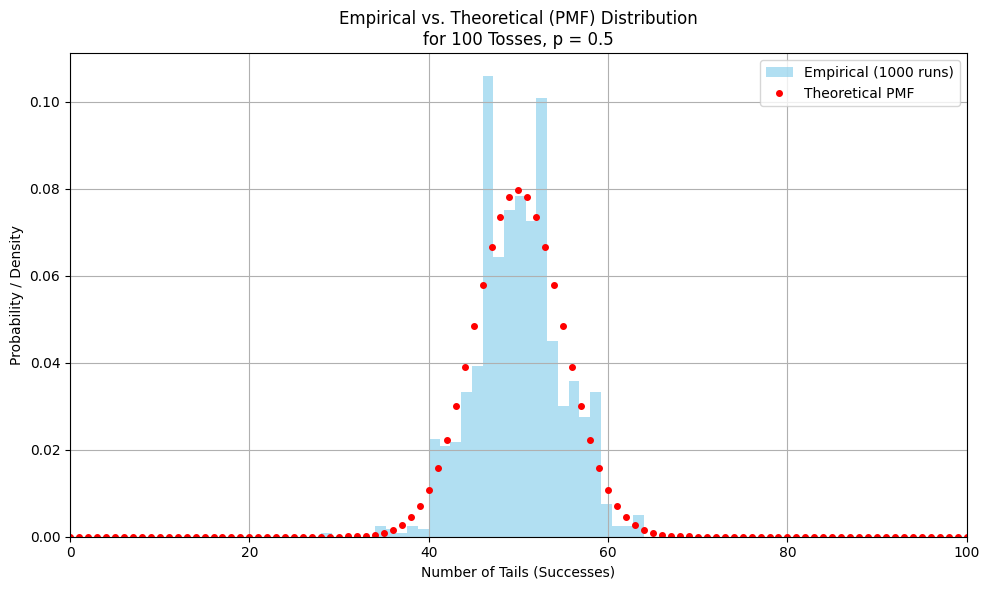

In [10]:
# Parameters
n = 100
p = 0.5

# --- Theoretical PMF ---
pmf = PMF_B(n, p)
Y_vals = np.array([item[0] for item in pmf])
prob_vals = np.array([item[1] for item in pmf])

# --- Empirical Distribution: 1000 rounds of 100 tosses ---
simulations = 1000
sim_results = [B(n, p) for _ in range(simulations)]

plt.figure(figsize=(10,6))
plt.hist(sim_results, bins=30, color='skyblue', alpha=0.65, density=True, label='Empirical (1000 runs)')
plt.plot(Y_vals, prob_vals, 'ro', markersize=4, label='Theoretical PMF')

plt.xlabel('Number of Tails (Successes)')
plt.ylabel('Probability / Density')
plt.title('Empirical vs. Theoretical (PMF) Distribution\nfor 100 Tosses, p = 0.5')
plt.legend()
plt.xlim(0, n)
plt.grid(True)
plt.tight_layout()
plt.show()

### Cummulative Density Function of B(n, p)

It's simply the sum of cummulated PMF over the support function of $0$ and $Y$ where I denoted successful experiment = $n$ (the number of experiments) with $Y$
$$F_y(y) = \sum_{i=0}^{\lfloor y \rfloor} \binom{n}{i} p^i (1-p)^{n-i}
$$

or rather correctly it's expressed as CDF is defined using a floor function $\lfloor y \rfloor$ which returns $y$ when $y$ is an integer, and the largest int smaller than $y$ when $y$ is not.

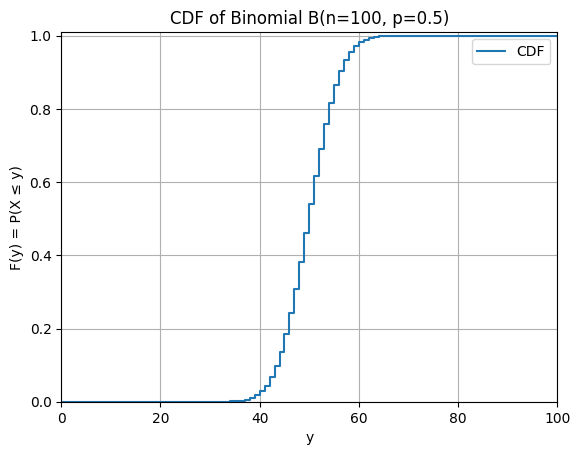

In [12]:
def CDF_B(PMF):
    """Converts PMF list to CDF list by cumulative summation"""
    cdf_list = []
    cumulative = 0
    for val, prob in PMF:
        cumulative += prob
        cdf_list.append([val, cumulative])
    return cdf_list


# -------- Usage ---------------
cdf = CDF_B(pmf) # pmf = PMF_B(n, p)
ys = [point[0] for point in cdf]
cdf_vals = [point[1] for point in cdf]

plt.step(ys, cdf_vals, where='post', label='CDF')
plt.xlabel('y')
plt.ylabel('F(y) = P(X ≤ y)')
plt.title(f'CDF of Binomial B(n={n}, p={p})')
plt.grid(True)
plt.xlim(0, n)
plt.ylim(0, 1.01)
plt.legend()
plt.show()

## Poisson 

Poisson rendom variables are used to measure counts of events over fixed time spans. For example, one application of a Poisson is to model the number of loan defaults / month. Poissions are always non-negatives, since - as there isn't such thing as negative probability - if $P(event) = 0.00...0$, than $E[Y]$ over theta = 0 for any theta window, given P=0 is constant over theta. Also Poisson random variables take integer values since it's a discrete probability, and there isn't such thing as a bond defaulting just a lil'bit. 

The Poisson distro takes a single input $\lambda$ - "Lambda" - which is called the hazard rate, that signifies the average number of (events / interval). Therfore, the mean and the variance of $Y ~ Poisson(\lambda)$ is:$$E[Y] = V[Y] = \lambda$$

The PMF of a Poisson random variable is:$$f_y(y) = \frac{\lambda^y exp(-\lambda)}{y!}$$

Meanwhile the CDF is:$$F(y) = e^{-\lambda} \sum_{k=0}^{\lfloor y \rfloor} \frac{\lambda^k}{k!}$$

The Poisson parameter $\lambda$ can be tought of as the hazard rate in survival modelling. 

As an example, consider a FI pf that consists of a large number of bonds. On average, five bonds within the pf default monthly. Assuming theat the probability of any bond defaulting is independent of the other bonds, what is the probability that exactly 2 bonds default in one month? In this case y = 2, and $\lambda$ = 5 since the mean number of defaults is stated to be 5, thus $E[Y] = \lambda = 5$

Pr( Poisson(Y = 2) ) = 0.0842


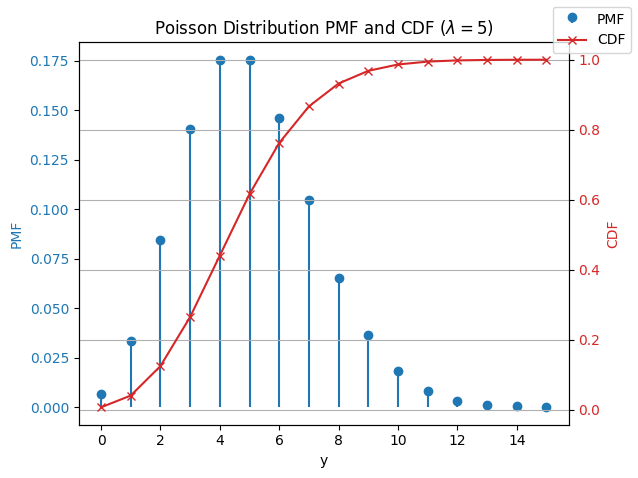

In [13]:
# Poisson PMF function
def poisson_pmf(lmbda,   # λ
                y):      # y
    return (lmbda ** y) * math.exp(-lmbda) / math.factorial(y) # f_y(y)

# Poisson CDF function
def poisson_cdf(lmbda,   # λ
                y):      # y
    floor_y = int(np.floor(y))
    cdf_sum = 0
    for k in range(floor_y + 1):
        cdf_sum += poisson_pmf(lmbda, k)
    return cdf_sum       # F(y)

# Parameters
lmbda = 5  # average number of events (hazard rate)
max_y = 15 # The choice of max_y = 15 in the example
# plotting code was an arbitrary decision to define a practical range for visualization of the Poisson PMF and CDF.
# A common heuristic is to pick max_y ≈ λ + 3 * sqrt(λ) to capture over 99% of the probability mass.
#from math import sqrt
#print(str(lmbda + 3 * sqrt(lmbda))) # = 11.70820393249937
    
# Sample: probability that exactly 2 bonds default in one month
y_example = 2
prob_y_example = poisson_pmf(lmbda, y_example)
print(f"Pr( Poisson(Y = {y_example}) ) = {prob_y_example:.4f}")

# Prepare values for plotting
ys = list(range(max_y + 1))
pmf_vals = [poisson_pmf(lmbda, y) for y in ys]
cdf_vals = [poisson_cdf(lmbda, y) for y in ys]

# Plot PMF and CDF
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.stem(ys, pmf_vals, basefmt=" ", label='PMF', linefmt=color, markerfmt='o')

ax1.set_xlabel('y')
ax1.set_ylabel('PMF', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title(r'Poisson Distribution PMF and CDF ($\lambda=5$)')

ax2 = ax1.twinx()  # instantiate second axes that shares x-axis
color = 'tab:red'
ax2.plot(ys, cdf_vals, color=color, marker='x', label='CDF')
ax2.set_ylabel('CDF', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

A useful feat of the Poisson (one that's uncommon among the rest of discrete distributions) is that is is infinitely divisible. If $X_1 ~ Poisson(\lambda_1)$, and $X_2 ~ Poisson(\lambda_2)$ are independent, and $Y = X_1 + X_2$ - e.g. no theta overlay -, then $Y ~ Poisson(\lambda_1 + \lambda_2)$ 

In other words, the sum of independent Poission variables is also a Poission. This feature makes the distribution well-suited to work with time-series data, because summing the number of events in a sampling interval (e.g. week, mon, qrtr) does not change the distribution.

[*********************100%***********************]  1 of 1 completed


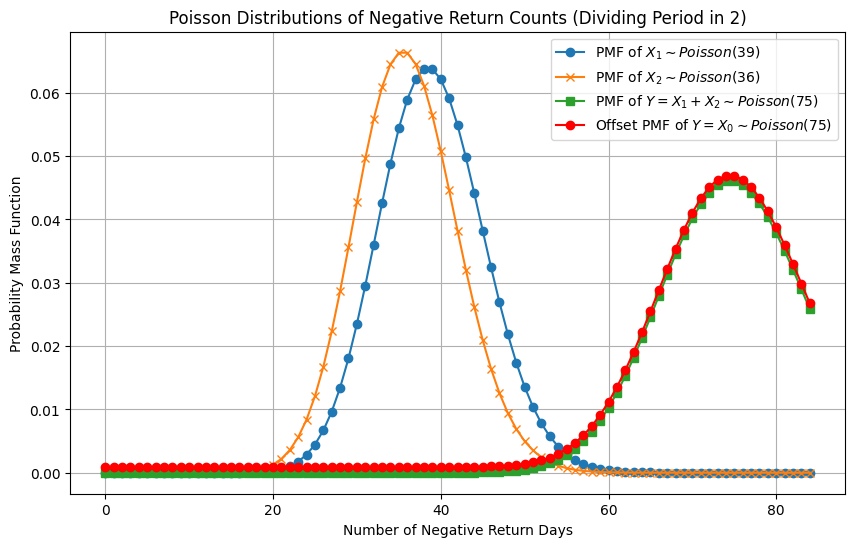

In [15]:
import yfinance as yf
from scipy.stats import poisson

# Download historical daily adjusted close price data for SPY
symbol = 'SPY'             # S&P 500 tracking major ETF
start_date = '2023-04-21'  # Sample theta interval start
end_date = '2024-01-01'    # end
a = 0.0009                 # Slight offset for pmf_y to highlight the perfect overlay. Set to 0 to cause the overlay
b = 0.0                    # Neutral "magnify"



# Download historical data with auto_adjust=True
price_data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)

# Compute daily log returns
price_data['log_return'] = np.log(price_data['Close'] / price_data['Close'].shift(1))

# Count negative returns (returns < 0) as event counts
price_data['neg_return_event'] = (price_data['log_return'] < 0).astype(int)

# Split into two halves
mid = len(price_data) // 2
X1_lambda = price_data['neg_return_event'].iloc[:mid].sum()
X2_lambda = price_data['neg_return_event'].iloc[mid:].sum()
Y_lambda = price_data['neg_return_event'].sum() # Actual lambda over the whole theta interval

# Prepare x-range for PMF plotting
x_range = np.arange(0, max(X1_lambda, X2_lambda, Y_lambda) + 10)

# Calculate PMFs
pmf_X1 = poisson.pmf(x_range, X1_lambda)
pmf_X2 = poisson.pmf(x_range, X2_lambda)
pmf_X_1_2 = poisson.pmf(x_range, X1_lambda + X2_lambda)  # Y = X_1 + X_2, construct 
pmf_Y = poisson.pmf(x_range, Y_lambda)
pmf_Y_offset = pmf_Y + a + b * x_range

# Plot PMFs
plt.figure(figsize=(10, 6))
plt.plot(x_range, pmf_X1, label=f'PMF of $X_1 \\sim Poisson({X1_lambda})$', marker='o')
plt.plot(x_range, pmf_X2, label=f'PMF of $X_2 \\sim Poisson({X2_lambda})$', marker='x')
plt.plot(x_range, pmf_X_1_2, label=f'PMF of $Y = X_1 + X_2 \\sim Poisson({X1_lambda + X2_lambda})$', marker='s')
plt.plot(x_range, pmf_Y_offset, label=f'Offset PMF of $Y = X_0 \\sim Poisson({Y_lambda})$', color='red', marker='o')
plt.title('Poisson Distributions of Negative Return Counts (Dividing Period in 2)')
plt.xlabel('Number of Negative Return Days')
plt.ylabel('Probability Mass Function')
plt.legend()
plt.grid(True)
plt.show()


# Continous Random Variables!

### Uniform - The simplest case

The simplest continous rand. var is the uniform! A uniform distibution assumes that any value within the range $[a, b]$ is equally likely to occur. Remember the chance of the possible sum of rolls for a fair dice plotted for 1 toss in CH1? This is kinda similar, but the outcomes are not just ints, but rather p is constant over any continous (real?) value of y unlike for ints in case of dice roll!

**The PDF of a uniform random variable is:** $$f_y(y) = \frac{1}{b-a}$$

I think it's named after, that any "possible" values of $y$ - meaning that $P(y) > 0.00...0$ - has a uniform chance of occuring regarding the outcomes, thus the probability distribution is **uniform**.

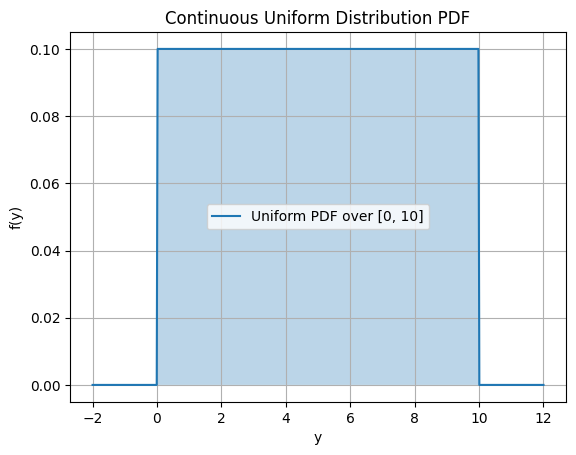

In [36]:
def PDF_Uniform(y, a, b):
    """
    Compute the PDF of continuous uniform distribution over [a,b] for input y.
    Returns 1/(b-a) if y in [a,b], else 0.
    """
    # uses the NumPy's where function to create a new array by applying a condition element-wise on the array y.
    return np.where((y >= a) & (y <= b), 1/(b - a), 0)

# Parameters
a = 0
b = 10

# Values to evaluate
y_values = np.linspace(a - 2,      # ~ min value / start of X-axis
                       b + 2,      # ~ max value / start of X-axis
                       500         # 500 points is a sufficiently dense sampling to create a smooth continuous-looking curve on the plot.
                      )            # Tough the PDF is actually continous, for plotting we need to give a "resolution" basically
pdf_values = PDF_Uniform(y_values, # Passing the y_valuues 
                         a, b)

# Plot
plt.plot(y_values, pdf_values, label=f'Uniform PDF over [{a}, {b}]')
plt.fill_between(y_values, pdf_values, alpha=0.3)
plt.title('Continuous Uniform Distribution PDF')
plt.xlabel('y')
plt.ylabel('f(y)')
plt.grid(True)
plt.legend()
plt.show()

def probability_uniform(a, # lower bound of possible values, usually denoted by a
                        b, # upper bound of possible values, usually denoted by a
                        y):# outcome y we seek the probability of
    if y >= a:
        if y <= b:
            return 1/(b - a)
    return 0

**And the CDF returns the cummulative probability of observing a value less than or equal the argument, expressed as:**$$
F_Y(y) = \begin{cases}
0, & y < a \\
\frac{y-a}{b-a}, & a \leq y \leq b \\
1, & y > b
\end{cases}
$$

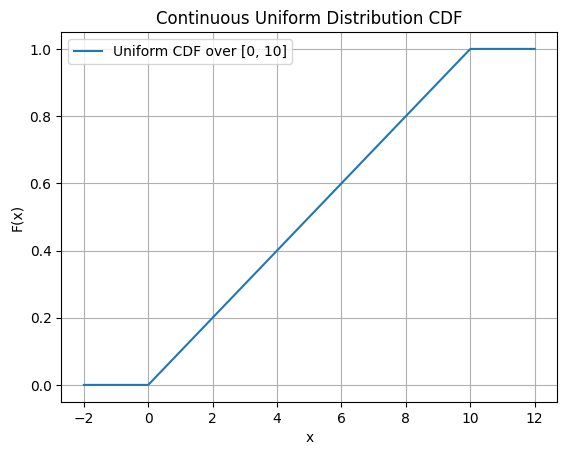

In [23]:
def CDF_Uniform(x, a, b):
    """
    Compute the CDF of a continuous uniform distribution over [a,b] for input x.
    Returns 0 if x < a, linear increase between a and b, and 1 if x > b.
    """
    cdf = np.where(x < a, 0,
                   np.where(x <= b, (x - a) / (b - a), 1))
    return cdf

# Parameters
a = 0
b = 10

# Values to evaluate
x_values = np.linspace(a - 2, b + 2, 500)  # Covers below a and above b
cdf_values = CDF_Uniform(x_values, a, b)

# Plot
plt.plot(x_values, cdf_values, label=f'Uniform CDF over [{a}, {b}]')
plt.title('Continuous Uniform Distribution CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()

Note that CDF(y) = 0 where y < a; and CDF(y) = 1.000 where y > b. In between basically it's the ratio of $\frac{y-a}{b-a}$.
Since between a and b P(y) is constant, the CDF linearly scales from a to b.

**When a = 0, and b = 1; the distibution is being called as the standard uniform.**

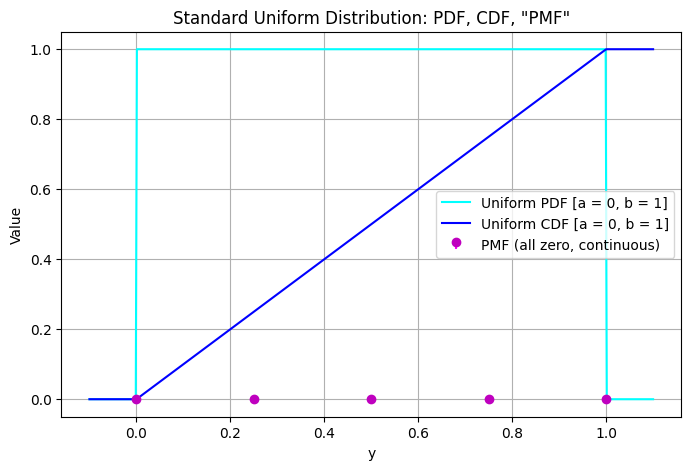

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def PDF_Uniform(x, a, b):
    return np.where((x >= a) & (x <= b), 1/(b - a), 0)

def CDF_Uniform(x, a, b):
    return np.where(x < a, 0,
                    np.where(x <= b, (x - a) / (b - a), 1))

# Parameters for standard uniform
a, b = 0, 1

# Continuous values for PDF & CDF
x_values = np.linspace(a - 0.1, b + 0.1, 500)
pdf_values = PDF_Uniform(x_values, a, b)
cdf_values = CDF_Uniform(x_values, a, b)

# "Discrete points" for illustrative PMF bars
pmf_points = np.array([0, 0.25, 0.5, 0.75, 1])
# The PMF for a truly continuous uniform is zero at all points, but for illustration, plot small bars
pmf_values = np.zeros_like(pmf_points)

plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label='Uniform PDF [a = 0, b = 1]', color='cyan')
plt.plot(x_values, cdf_values, label='Uniform CDF [a = 0, b = 1]', color='blue')
plt.stem(pmf_points, pmf_values, linefmt='magenta', markerfmt='mo', basefmt=' ', label='PMF (all zero, continuous)')
plt.title('Standard Uniform Distribution: PDF, CDF, "PMF"')
plt.xlabel('y')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Actually any uniform random variable can be constructed from the standard uniform . Let's denote the standard uniform as $U_1$; then:$$
U_2 = a + (b-a) * U_1$$
Where $a$ and $b$ are the bounds of $U_2$. So we have b-a in the formula since we want to multipy $U_1$ with the range length constructed by b (upper bound) and a (lower bound), and we have a as a constant to shift rightwards if positive, leftwards if negative. This works vice versa as we can get the standard uniform by: $$U_1 = \frac{U_2 - a}{b - a}$$

Which is actually a neat trick arising from $$Y = a + bX$$

Mind you that basically here we shift the location of the samples on the x-axis, and on the y the value changes (as the PDF needs a recalc) to  $1 / len(range)$ where range = b - a

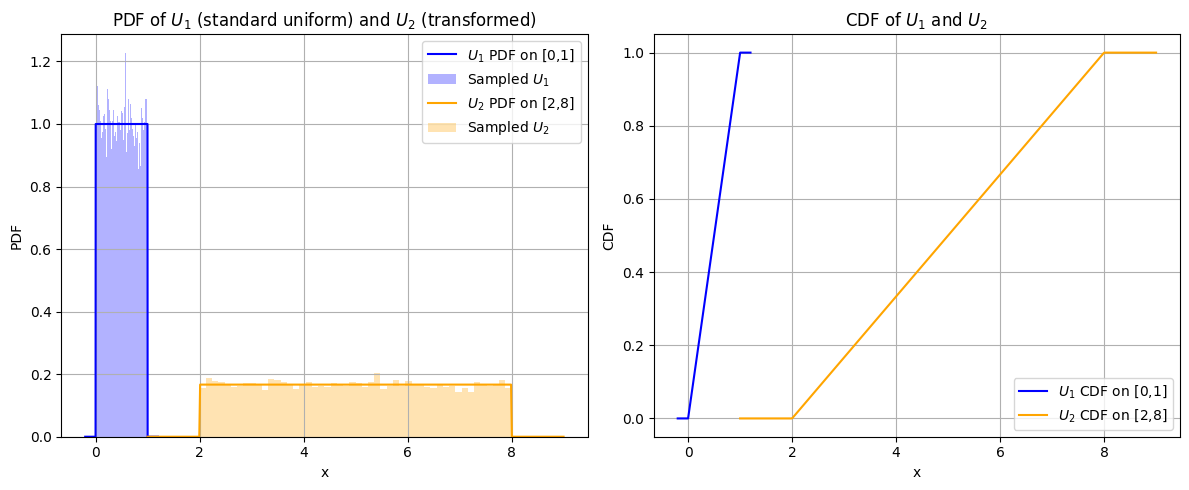

In [37]:
# Standard uniform samples U1 on [0,1]
n_samples = 10000                               # Sampling count
U1_samples = np.random.uniform(0, 1, n_samples) # Numpy's uniform random simulation

# Parameters of the target uniform distribution U2 on [a, b]
a = 2 # a paramater of U_2 we transform to
b = 8 # b parameter of U_w we transform to

# Transform U1 samples to U2 samples on [a,b]
U2_samples = a + (b - a) * U1_samples # transformation, U_2 = a + (b-a) * U_1 simulation samples
# a transforms over the x plane
# b-a shrinks spreads it out basically to span over (8-2) = 6 unit of x axis instead of (1-0) = 1 unit

# Define PDF and CDF for uniform distribution
def PDF_Uniform(x, a, b):
    return np.where((x >= a) & (x <= b), 1/(b - a), 0)

def CDF_Uniform(x, a, b):
    return np.where(x < a, 0,
                    np.where(x <= b, (x - a) / (b - a), 1))

# Evaluation points for plotting
x_U1 = np.linspace(-0.2, 1.2, 500)
x_U2 = np.linspace(a - 1, b + 1, 500)

# Compute theoretical PDFs and CDFs
pdf_U1 = PDF_Uniform(x_U1, 0, 1)
cdf_U1 = CDF_Uniform(x_U1, 0, 1)
pdf_U2 = PDF_Uniform(x_U2, a, b)
cdf_U2 = CDF_Uniform(x_U2, a, b)

# Plot PDFs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('PDF of $U_1$ (standard uniform) and $U_2$ (transformed)')
plt.plot(x_U1, pdf_U1, label='$U_1$ PDF on [0,1]', color='blue')
plt.hist(U1_samples, bins=50, density=True, alpha=0.3, color='blue', label='Sampled $U_1$')
plt.plot(x_U2, pdf_U2, label=f'$U_2$ PDF on [{a},{b}]', color='orange')
plt.hist(U2_samples, bins=50, density=True, alpha=0.3, color='orange', label='Sampled $U_2$')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)

# Plot CDFs
plt.subplot(1, 2, 2)
plt.title('CDF of $U_1$ and $U_2$')
plt.plot(x_U1, cdf_U1, label='$U_1$ CDF on [0,1]', color='blue')
plt.plot(x_U2, cdf_U2, label=f'$U_2$ CDF on [{a},{b}]', color='orange')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Logically the expected value $E[Y]$ of a uniform variable is a midpoint of the bounts, since the probability in between is constant.$$E[Y] = \frac{(a + b)}{2}$$

In [27]:
def E_Y_uniform(a, b):
    return (a + b) / 2 # = E[Y]

# Theoretical means for Standard Uniform Random Variable (U_1) and U(2,8) <- U_2
print(f"---| E[Y] of U_1 = {E_Y_uniform(0,1)} and E[Y] of U_2 = {E_Y_uniform(a,b)} |---")

# Sample means from simulations, and prints
mean_U1 = np.mean(U1_samples)
mean_U2 = np.mean(U2_samples)
print(f"Mean of the simulation for U_1 is {mean_U1:.4f}")
print(f"Mean of the simulation for U_2 is {mean_U2:.4f}")

---| E[Y] of U_1 = 0.5 and E[Y] of U_2 = 5.0 |---
Mean of the simulation for U_1 is 0.4964
Mean of the simulation for U_2 is 4.9783


**Meanwhile the variance is dependent of the width of the support function**$$ V[Y] = \frac{(b-a)^2}{12}$$

Which is in case of a standard uniform random variable is: $V[Y] = (1-0)^2 / 12 = 1/12$, and the midpoint ($E[Y]$) is $E[Y] = (1 - 0) / 2 = 1/2$.
The constant of 12 arising from the integral definition of $V[Y]$ actually, but I don't see value in brakeing it down for now.

In [28]:
def V_Y_uniform(a, b):
    return ((b - a) ** 2) / 12

print(f"Variance of the standard uniform random variable is: V[Y] = {V_Y_uniform(0,1):4f}")
print(f"While if a = {a} and b = {b}; V[Y] = {V_Y_uniform(a,b):4f}")

Variance of the standard uniform random variable is: V[Y] = 0.083333
While if a = 2 and b = 8; V[Y] = 3.000000


The probability that a uniform variable $Y ~ uniform(a, b)$ falls between *lower* bound $l$ and *upper* bound $u$; i. e. $Pr(l< Y < u)$ is$$\Pr(l < Y < u) = \int_{l}^{u} \frac{1}{b - a} \, dy = \frac{u - l}{b - a}$$

As an example let's get a theoretical (not simulated / observed) uniform random variable $Y ~ U(-2, 4)$, than 

In [167]:
def uniform_between(a, b, l, u):
    # Note that if I'd input u-l range outside of a-b I'd get false positives, and can push the Pr over 1.00
    if a > b:
        raise ValueError("Parameter a must be <= b.")
    if l > u:
        raise ValueError("Lower bound l must be <= upper bound u.")
    # Clip l, u to [a, b]
    l = max(a, l)
    u = min(b, u)
    if u <= l:
        return 0.0  # No overlap
    return (u - l) / (b - a)

# Parameters
a = -2
b = 4
l = a + 1
u = b - 1

print("Y ~ U(a,b) where U(a,b) denotes uniform variable with lower bound a and upper bound b regarding the support function")
print(f"a = {a}; b = {b}")
print(f'lower bound "l" = {l}; upper bound "u" = {u}')
print(f"E[Y] = {E_Y_uniform(a,b):.4f}")
print(f"V[Y] = {V_Y_uniform(a,b):.4f}")
print(f"Pr({l} < Y < {u}) = {uniform_between(a,b,l,u):.4f}")
print("Which is basically the ratio of (l-u) = (3 - {-1}) = 4; over (b-a) = (4 - {-2}) = 6; so 4/6 = 0.6667")

Y ~ U(a,b) where U(a,b) denotes uniform variable with lower bound a and upper bound b regarding the support function
a = -2; b = 4
lower bound "l" = -1; upper bound "u" = 3
E[Y] = 1.0000
V[Y] = 3.0000
Pr(-1 < Y < 3) = 0.6667
Which is basically the ratio of (l-u) = (3 - {-1}) = 4; over (b-a) = (4 - {-2}) = 6; so 4/6 = 0.6667


# The Mighty Normal Distribution a.k.a. "The Gaussian Distribution" a.k.a. "The Bell Curve"

I doubt any introduction is needed for anyone undertaking FRM. It's literally everywhere, thus the name: "Normal Distribution". It's constructed by 2 input variables, the mean (usually esimated by samples of the population, or historical data) and the standard deviation of the observations. The majority of the population (~ 2/3) centers around the mean within 1 std. dev distance of the metric, and the supermajority (~98%) is within 3 stddev. 

It is also the most commonly utilized distribution in risk management. 

Usage is popular due to many reasons such as:
- Most of the continous random variables are roughly normally distributed
- The distro of many discrete random vars can be well approximated by norm.dist
- Normal dist. plays a key role in Central Limit Theorem -> https://www.youtube.com/watch?v=zeJD6dqJ5lo
- Norm. rand. var. are infinitely divisible, which makes them suitable for simulating asset prices in models that assume that prices are continously evolving
- Closely related to many other popular distros such as Student's t, the F, and so in.

So as discussed, it has 2 parameters, the *mean* $\mu$ and the *variance* $\sigma^2$. Therefore the expected value is:$$E[Y] = \mu$$and$$V[Y] = \sigma^2$$
The *skewness* of the norm. dist = 0.00 since it's symmetrical; and the *kurtosis* == 3.00. The norm.dist's *kurtosis* is often utilized as a benchmark for kurtosis in order to aid relativistic interpretation, for example if the observed *kurtosis* > 3.00; the distribution may be discribed "fat-tailed" as it's usually the case regarding asset returns

The notm dist can take theoretically take any value in $(-\infty, \infty)$, but observations more than $4\sigma$ away from $\mu$ is extremely unlikely. Theoretically, observations in excess of $3\sigma$ away of $\mu$ of a simplation where $n = 10,000$ are expexted to be realized
~ 370.

### The PMF of the Normal Distribution
$$
f_Y(y) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left(-\frac{(y-\mu)^2}{2\sigma^2}\right)
$$
Ha-ha! So at the end, where is the cicle? <- https://www.youtube.com/watch?v=cy8r7WSuT1I

Anyway, so what about the CDF?

### The CDF does not have a closed form solution
But there are an array of approximation methods widely available in Excel, or other applications.

### The STANDARD Normal
Is when $\mu = 0.000$ and $\sigma^2 = 1.000$; and in that instance, it's commond to denote the random variable with $Z$ as $Z ~ N(0,1)$, and it's common to denote the standard normal PFD with small "phi" as $\phi(z)$; and the CDF with capital phi as $\Phi(z)$, so: $$
\text{Standard Normal PDF} = \phi(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$

### Usual Norm Dist applications
1. The quantiles are used to approcimate the chance of observing values more than $1\sigma$, $2\sigma$, $3\sigma$ away from the mean when describeing la log return as a normal random variable.

2. When constructing confidence intervals (think $\alpha$ input of  VaR and CVaR)

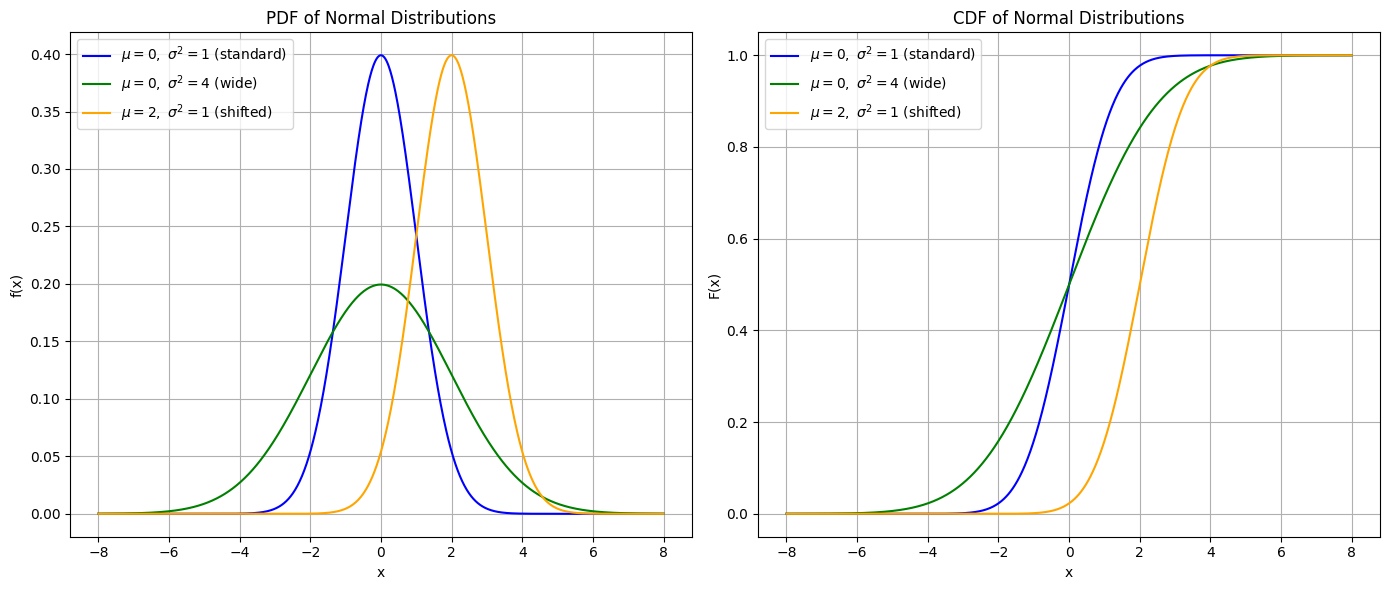

In [38]:
# New Import
from scipy.stats import norm

# Parameters
dist_params = [
    (0, 1),   # Standard normal: μ = 0, σ² = 1
    (0, 4),   # Same center at 0; 2 x spread (sqrt of var_2/var_std) compared to normal arising from elevated variance
    (2, 1),   # Same spread, but the density plot shifted 2 units of X-axis towards the right
]
colors = ['blue', 'green', 'orange']
labels = [
    r'$\mu=0,\ \sigma^2=1$ (standard)',
    r'$\mu=0,\ \sigma^2=4$ (wide)',
    r'$\mu=2,\ \sigma^2=1$ (shifted)'
]

# X range sufficient for all 3
x = np.linspace(-8, 8, 1000)
plt.figure(figsize=(14, 6))



# PDF Plot
plt.subplot(1, 2, 1)
for i, (mu, var) in enumerate(dist_params):
    std = np.sqrt(var)
    pdf = norm.pdf(x, loc=mu, scale=std)
    plt.plot(x, pdf, color=colors[i], label=labels[i])
plt.title("PDF of Normal Distributions")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# CDF Plot
plt.subplot(1, 2, 2)
for i, (mu, var) in enumerate(dist_params):
    std = np.sqrt(var)
    cdf = norm.cdf(x, loc=mu, scale=std)
    plt.plot(x, cdf, color=colors[i], label=labels[i])
plt.title("CDF of Normal Distributions")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

So it's a common stuff to ilustrate stuff with confidence intervals, or with "within" and "outside" of a given multiplication of $\sigma$. Let me draft you a neat example from IQ. As I understood any test ~ needs a sample population filling it out, and the aim is to get an as realistic sample of the population as possible. Now we say, the mean result is $100IQ$. I'm not sure if it's observed or just a defined construct, but basically it's standard deviation is $15$ points. So we can with this example ilustrate the concept of confidence intervals, and the sigma thing.

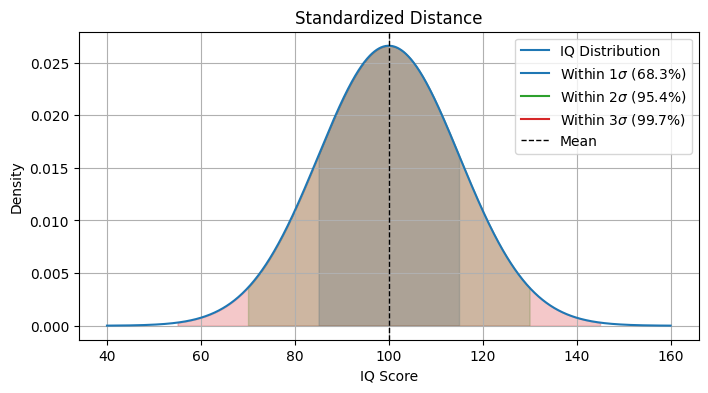

IQ bounds within ±1σ: [85.0, 115.0], Probability: 68.27%
IQ bounds within ±2σ: [70.0, 130.0], Probability: 95.45%
IQ bounds within ±3σ: [55.0, 145.0], Probability: 99.73%


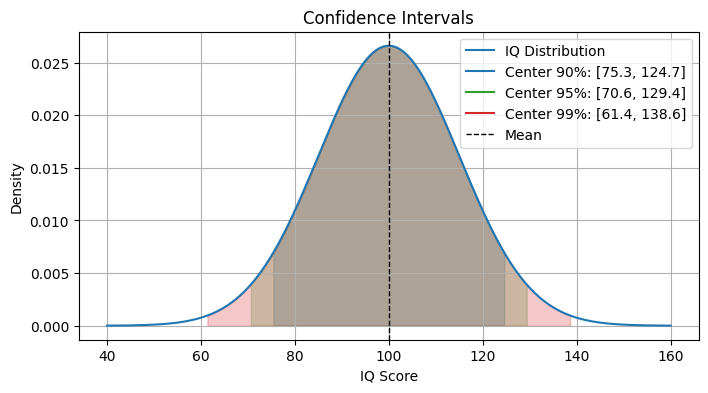

The central 90% probability interval is [75.33, 124.67]
The central 95% probability interval is [70.60, 129.40]
The central 99% probability interval is [61.36, 138.64]


In [39]:
# Parameters
mu = 100    # Mean IQ
sigma = 15  # Standard deviation

# 1, 2, 3-sigma intervals
deltas = np.array([1, 2, 3])         # Sigma intervals
lower_bounds = mu - deltas * sigma   # Makes a list actually, and passes deltas for all delta (1, 2, 3)
upper_bounds = mu + deltas * sigma   # Same
probs_within = norm.cdf(upper_bounds,# CDF of mu + i * sigma -> 100 + 15i
                        loc=mu,      # location = mu = 100
                        scale=sigma  # dispersion basis = sigma = 15
                       ) - norm.cdf(lower_bounds, loc=mu, scale=sigma) # CDF(115) - CDF(85) = IQR

# Plot: Standardized Distance
plt.figure(figsize=(8,4))
x = np.linspace(mu - 4*sigma,        # X axis max = mu(100) + 4 * sigma(15) = 160
                mu + 4*sigma,        # X axis min = mu(100) - 4 * sigma(15) = 40
                1000)                # number of dots to approximate with
plt.plot(x, norm.pdf(x, mu, sigma), label='IQ Distribution') # Plots a point for every Y over x for a "resolution" of 1000
colors = ['#1f77b4', '#2ca02c', '#d62728'] # colour code definitions
for i, d in enumerate(deltas): # pass index and delta of sigma
    color = colors[i]
    plt.fill_between(x, 0, norm.pdf(x, mu, sigma), where=(x>=mu-d*sigma)&(x<=mu+d*sigma), 
                     color=color, alpha=0.25)
    plt.plot([], [], color=color, label=fr'Within {d}$\sigma$ ({probs_within[i]*100:.1f}%)')  # invisible line for legend
plt.axvline(mu, color='k', linestyle='--', lw=1, label='Mean')
plt.title('Standardized Distance')
plt.xlabel('IQ Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Print actual IQ bounds and probability for each sigma interval
for d, lo, up, p in zip(deltas, lower_bounds, upper_bounds, probs_within):
    print(f'IQ bounds within ±{d}σ: [{lo:.1f}, {up:.1f}], Probability: {p*100:.2f}%')

# Alpha/Central probability intervals
alphas = np.array([0.9, 0.95, 0.99])  # Alpha passes / confidence intervals
quantiles = norm.ppf(0.5 + alphas/2)  # Distance from mean
ci_lowers = mu - quantiles * sigma
ci_uppers = mu + quantiles * sigma
interval_widths = ci_uppers - ci_lowers

# Plot: Confidence Intervals
plt.figure(figsize=(8,4))
plt.plot(x, norm.pdf(x, mu, sigma), label='IQ Distribution')
for i, alpha in enumerate(alphas):
    color = colors[i]
    plt.fill_between(x, 0, norm.pdf(x, mu, sigma), where=(x>=ci_lowers[i])&(x<=ci_uppers[i]), 
                     color=color, alpha=0.25)
    plt.plot([], [], color=color, label=f'Center {int(alpha*100)}%: [{ci_lowers[i]:.1f}, {ci_uppers[i]:.1f}]')  # invisible line for legend
plt.axvline(mu, color='k', linestyle='--', lw=1, label='Mean')
plt.title('Confidence Intervals')
plt.xlabel('IQ Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Show central intervals for each selected alpha
for alpha, lo, up in zip(alphas, ci_lowers, ci_uppers):
    print(f'The central {int(alpha*100)}% probability interval is [{lo:.2f}, {up:.2f}]')


### Approximating Discrete Random Variables

Recall that due to CLT, B(n, p)'s realized discrete distribution will start to closely approximate normal distribution given that $np$ and $(1-n)p$ are sufficiently large? It is common to state that the sufficient count of both exceeds 10, than it's getting "close enough"! The same stands for $Poisson(\lambda)$, if $\lambda$ gets sufficiently large, than $Poisson(\lambda)$ can be well approximated by $N(mean = \lambda, variance = \lambda$).

### Log - Normal

A variable $Y$ is said to be log-normally distributed if the natural logarithm of $Y$ is normallly distributed. In other words, if $X = ln Y$, then $Y$ is log-normally distributed if AND ONLY IF! $X$ is normally distributed. Alternatively, a log-normal can be defined as$$Y = exp(Y)$$Where $X \ N(\mu, \sigma)$. Recall that ln() is the opposite of exp() as division is to the multiplication.

An important properity of log-normal distribution is that $Y$ can never be negative, whereas $X$ can be negative because is is normally distributed. This log-normal prop can be desirable when constructing certain models. For example, if stock prices are assumed to be normally fistributed, there is a positive (but tiny) prob that the stock price turns negative, which would not be realistic. 

A log-norm distro can be denoted as $Y ~ LogN(\mu, \sigma^2)$, or equivalently as $ln(Y) ~ N(\mu, \sigma^2)$ where $ln(Y)$ is normally distributed with mean $\mu$ and variance $\sigma^2$.  Here $Y$ is a non-linear transformation of a normal random variablwe and the mean of $Y$ is $exp(\mu + \sigma^2/2)$. The extra term $ + \sigma^2/2$ opposing to the usual mean calculations is arising from Jensen's Inequality: the exp(x) function is convex, si it must be the case that $E[Y] >= exp(E[x]) = exp(\mu)$. The variance depends on both model parameters as well: $V[Y] = (exp(\sigma^2) - 1) * exp(2\mu + \sigma^2)$.

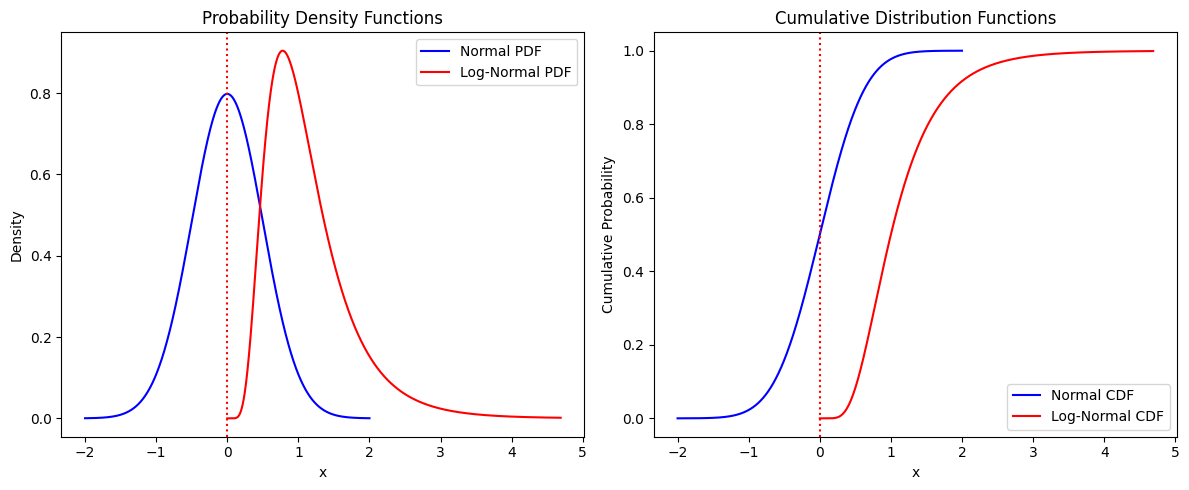

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

mu = 0
sigma = 0.5
s = sigma
scale = np.exp(mu)

# Define x for Normal (can be negative)
x_norm = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Define x for Log-Normal (strictly positive)
x_lognorm = np.linspace(0.001, lognorm.ppf(0.999, s=s, scale=scale), 1000)

# Compute PDFs
pdf_normal = norm.pdf(x_norm, loc=mu, scale=sigma)
pdf_lognormal = lognorm.pdf(x_lognorm, s=s, scale=scale)

# Compute CDFs
cdf_normal = norm.cdf(x_norm, loc=mu, scale=sigma)
cdf_lognormal = lognorm.cdf(x_lognorm, s=s, scale=scale)

# Plot PDFs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_norm, pdf_normal, label='Normal PDF', color='blue')
plt.plot(x_lognorm, pdf_lognormal, label='Log-Normal PDF', color='red')
plt.title('Probability Density Functions')
plt.xlabel('x')
plt.ylabel('Density')
plt.axvline(x=0, color='red', linestyle='dotted')
plt.legend()

# Plot CDFs
plt.subplot(1, 2, 2)
plt.plot(x_norm, cdf_normal, label='Normal CDF', color='blue')
plt.plot(x_lognorm, cdf_lognormal, label='Log-Normal CDF', color='red')
plt.title('Cumulative Distribution Functions')
plt.axvline(x=0, color='red', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()


### Chi-Square Distribution - $\chi^2$

A random variable $X$ is said to have a chi-square distribution with $k$ degrees of freedom if it can be expressed as the sum of squares of $k$ independent standard normal variables. Formally, if

$$
Z_1, Z_2, \ldots, Z_k \sim \text{i.i.d. } N(0,1),
$$

then

$$
X = \sum_{i=1}^k Z_i^2 \sim \chi^2(k).
$$

The parameter $k$, called the degrees of freedom, determines the shape of the distribution. The chi-square distribution is a continuous distribution defined on the positive real line $[0, \infty)$, and it is generally right-skewed, with the skewness decreasing as $k$ increases. For larger degrees of freedom, the chi-square distribution approaches a normal distribution due to the central limit theorem.

Some key properties include:
- Mean: $E[X] = k$,
- Variance: $\mathrm{Var}[X] = 2k$.

The chi-square distribution is widely used in inferential statistics, especially for hypothesis testing including the chi-square goodness-of-fit test, tests of independence, and in constructing confidence intervals for variances.

Unlike the normal distribution, the chi-square distribution cannot take negative values; it measures squared deviations and thus is always non-negative.

In notation, a chi-square distributed variable is denoted as:

$$
X \sim \chi^2(k)
$$

where $k$ is the degrees of freedom.

---

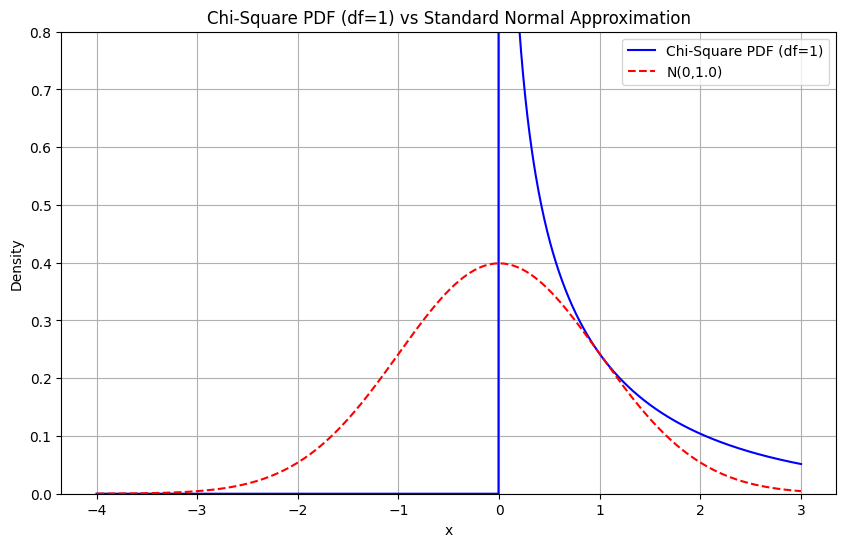

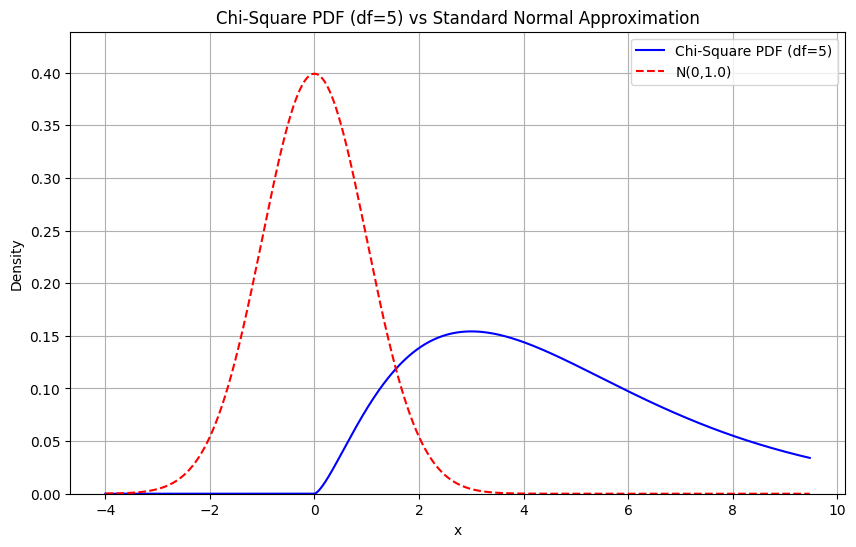

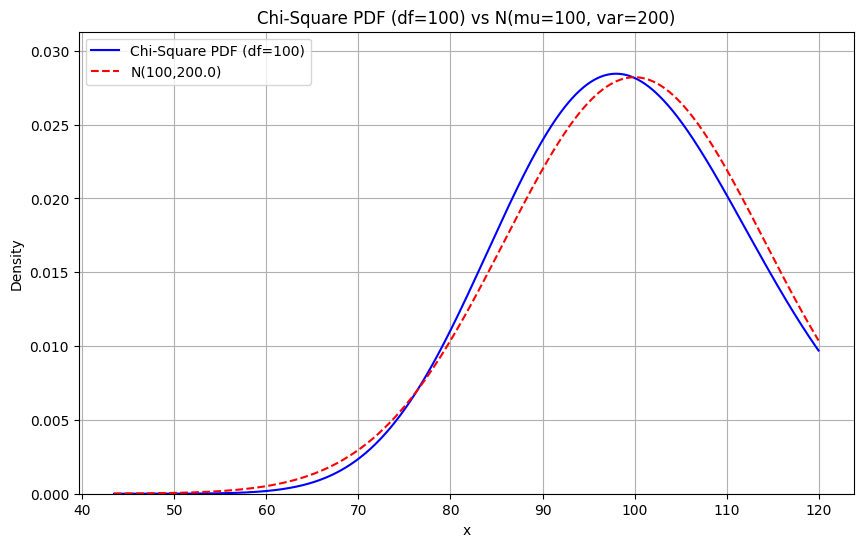

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

def chi_vs_norm(k, suppress_std_normal=False):
    # Parameters for chi-square and normal distributions
    df = k  # degrees of freedom for chi-square
    
    if suppress_std_normal:
        mu_norm = k  # mean of approximating normal
        sigma_norm = np.sqrt(2 * k)  # std.dev of approximating normal
    else:
        mu_norm = 0
        sigma_norm = 1
    
    # Define x range for plotting (may include negative values)
    x_min = mu_norm - 4 * sigma_norm
    x_max = k + 2 * k * (1/np.sqrt(k) )
    x = np.linspace(x_min, x_max, 1000)
    
    # Chi-square is supported only for x >= 0
    # Compute PDF only for x >= 0, zero otherwise
    pdf_chi2 = np.where(x >= 0, chi2.pdf(x, df=df), 0)
    
    # Normal PDF on the whole range
    pdf_norm = norm.pdf(x, loc=mu_norm, scale=sigma_norm)
    
    # Plot PDFs
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf_chi2, label=f'Chi-Square PDF (df={df})', color='blue')
    

    plt.plot(x, pdf_norm, label=f'N({mu_norm},{sigma_norm**2:.1f})', 
                 color='red', linestyle='dashed')

        
    plt.title(f'Chi-Square PDF (df={df}) vs Standard Normal Approximation')
    if suppress_std_normal:
        plt.title(f'Chi-Square PDF (df={df}) vs N(mu={k}, var={2*k})')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # Limit y-axis between 0 and 0.8, but scale to data basis' Y ceiling * 1.1
    plt.ylim(0, min(0.8, max(max(pdf_norm) * 1.1, max(pdf_chi2) * 1.1)))
    plt.show()

# Example usage
chi_vs_norm(1)  # Heavily right skewed, peak near zero visible
chi_vs_norm(5)  # Shifts right as mean increases
chi_vs_norm(100, suppress_std_normal=True)  # Large k, chi-square approaches normal


### Student's t-Distribution

The Student's t distribution is closely related to the normal, but it has heavier (i. e. "Fatter") tails. The Student's t was originally developed for testing hypotheses using small samples.

A Student's t distribution is a one argument function, and the one parameter commonly denoted by $\nu$, also called the degrees of freedom parameter. While it affects many aspects of the distro, the key impact is on the shape of the tails. 

A Student's t can be defined as the distribution of the std. dev. normal random variable divided by the square root of an independent Chi-squared random variable, itself divided by it's degrees of freedom. So basically near the middle we dectrease the values the Gaussean takes, but as we venture further and further from the mean, the divisor peeks below one and acts as a multiplyer. Student t usually seen denoteg with $T$, but the book consistently applies $Y$ for the result of a random process, so:

$$
Y = \frac{Z}{\sqrt{W / \nu}},
$$

where $Z \sim N(0, 1)$, so basically representing the standard Gaussean, and $W \sim \chi_\nu^2\ $ so $Chi^2$ with nu ($\nu$) degrees of freedom. Note that $Z$ and $W$ are independent!

The parameter $\nu$, called the degrees of freedom, controls the shape of the distribution. The Student's t-distribution is continuous, symmetric around zero, and has heavier tails than the standard normal distribution. As $\nu \to \infty$, the t-distribution approaches the standard normal distribution due to the central limit theorem.

**Expected value**

$E[Y] = 0$ for $\nu > 1$ since $Y$ is basically being a transformed standard normal which by definition has a mean of 0, and the transformation doesn't meddle with the standard normal's symmetry, thus it's being preserved and $skewness(Y) = 0$.

**Variance**

$V[Y] = \frac{\nu}{\nu-2}$ Note the second argument of the Gaussian: $N(\rho = 0, \sigma^2 = 1)$. The constant of 1 is preserved, but multiplied with a term dependent on $\nu$.

**Kurtosis**

$kurtosis[Y] = 3 \frac{\nu - 2}{\nu - 4}$ Recall that $kurtosis(N(0, 1)) = 3$? That explains the constant, and $T(\nu)$'s kurtosis is dependent on $\nu$.


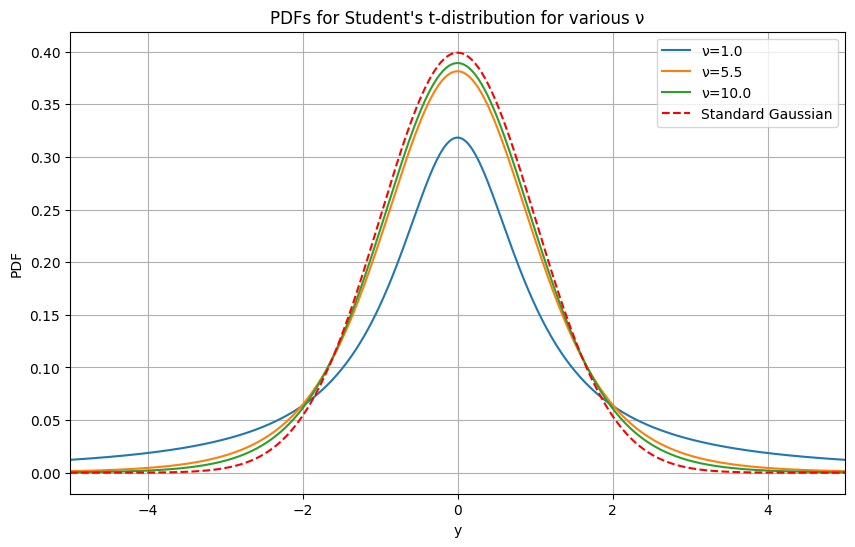

In [132]:
from scipy.stats import t

def T(nu, size=10000, random_state=None):
    rng = np.random.default_rng(random_state)
    Z = rng.normal(0, 1, size)
    W = rng.chisquare(nu, size)
    Y = Z / np.sqrt(W / nu)
    return Y

nu_values = np.arange(1, 1.01 + 2 * 4.5, 4.5)
x_vals = np.linspace(-5, 5, 500)

plt.figure(figsize=(10, 6))

for nu in nu_values:
    pdf = t.pdf(x_vals, df=nu)
    plt.plot(x_vals, pdf, label=f'ν={nu:.1f}')

# Add the standard normal PDF as a red dotted line
std_normal_pdf = norm.pdf(x_vals)
plt.plot(x_vals, std_normal_pdf, 'r--', label='Standard Gaussian')

plt.title("PDFs for Student's t-distribution for various ν")
plt.xlabel("y")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)
plt.show()


Note how compared to the std normal (red dotted) $T(\nu)$ has a smaller peak, and near $\sigma * 2$ $T(\nu)$ intersects and as the distance to $\rho$ increases $PDF(T(\nu)) > PDF(N)$! The kurtosis of T() is always higher than N()'s, but as $\nu \to \infty$ T() approaches N(), which can be percieved trough the deltas of kurtosis()!

The mean is only finite if $\nu > 1$, the Variance needs $\nu > 2$, and the kurtosis $\nu > 4$. In general, the $m$th moment of $T(\nu)$ is only finite if $\nu > m$.

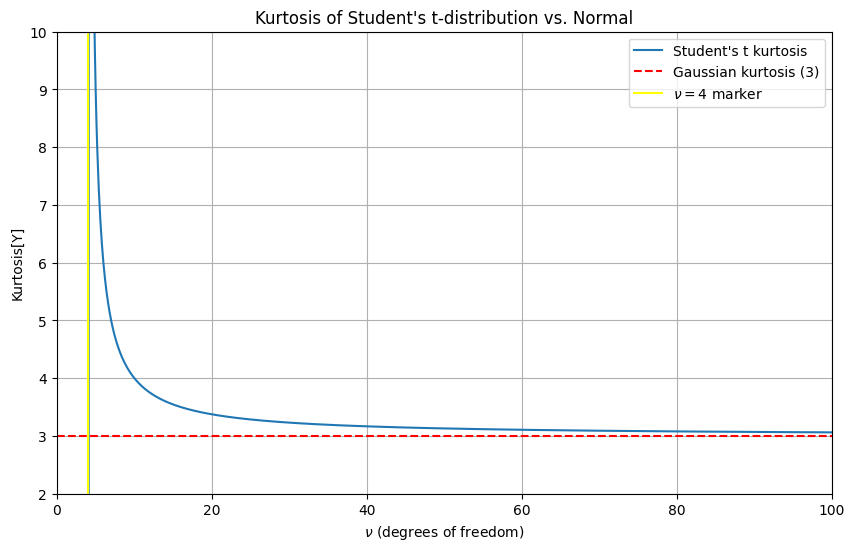

In [143]:
import numpy as np
import matplotlib.pyplot as plt

def kurtosis_Student_T(v):
    return 3 * (v - 2) / (v - 4)  # Only meaningful for v > 4

# Use v values starting below and above 4 to show behavior near the singularity
nu_passes: list = np.arange(0.5, 1000, 0.1)
kurtosis_N_0_1: int = 3  # kurtosis of standard normal
kurt_t = kurtosis_Student_T(nu_passes)

plt.figure(figsize=(10, 6))
plt.plot(nu_passes, kurt_t, label="Student's t kurtosis")

# Horizontal red line at y=3 (normal kurtosis)
plt.axhline(y=kurtosis_N_0_1, color='red', linestyle='--', label='Gaussian kurtosis (3)')

# Vertical blue line at x=4 (singularity for kurtosis formula)
plt.axvline(x=4, color='yellow', linestyle='-', label=r'$\nu=4$ marker')
plt.xlabel(r'$\nu$ (degrees of freedom)')
plt.ylabel("Kurtosis[Y]")
plt.title("Kurtosis of Student's t-distribution vs. Normal")
plt.legend()
plt.grid(True)
plt.ylim(2, 10)
plt.xlim(0, 100)
plt.show()

In some applications of a Student's t it is desireable to separate the degrees of freedom from the variance in order to generate a t-distro with unit variance. Using the basic result that:$$V[aY] = a^2V[Y]$$it is easy to see  when Y ~ $T(\nu)$ $$V\left[\sqrt{\frac{\nu - 2}{\nu}} Y\right] = 1$$
This is know as the standardized student since it's mean is 0, and its variance is 1 for any value of $\nu$. **Importantly, it can be rescaled to have any variance if $\nu > 2$!**

Hence the generalized Student's t w ddof > 2 that have been rescaled to have mean $\mu$ and variance $\sigma^2$, denoted usually as $Gen. T_nu(\mu, sigma^2)$.

The parameterization makes the generalized S's t better suited for modelling returns. It captures the heavy tail characteristics of returns better than N().

Empirical returns outside ±3σ: 0.0112 (1.12%)
Normal model probability outside ±3σ: 0.0027 (0.27%)
Student's t model (ν=5) probability outside scaled ±3σ: 0.0677 (6.77%)


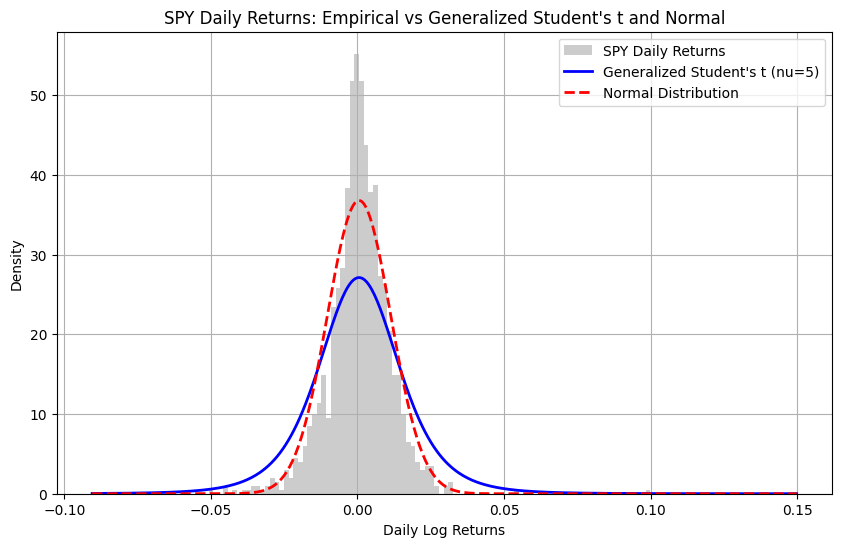

In [148]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from datetime import datetime

# Fix date range for consistent data: last 5 years from today, fixed end date
end_date = '2025-10-11'  # fixed end date to ensure reproducibility
start_date = '2020-10-11'  # 5 years before

# Download SPY daily data for fixed date range
spy = yf.download('SPY', start=start_date, end=end_date, interval='1d', progress=False)

# Calculate daily log returns using Close price
spy['returns'] = np.log(spy['Close'] / spy['Close'].shift(1))
returns = spy['returns'].dropna().values

# Estimate mean and variance
mu, sigma2 = np.mean(returns), np.var(returns)
sigma = np.sqrt(sigma2)

# Generalized Student's t PDF parametrization
def generalized_t_pdf(x, mu, sigma, nu):
    scale = sigma * np.sqrt(nu / (nu - 2))
    return t.pdf((x - mu) / scale, df=nu) / scale

nu = 5
scale = sigma * np.sqrt(nu / (nu - 2))

# Define bounds for 3-sigma exceedance
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Empirical fraction outside 3 sigma
empirical_outside = np.mean((returns < lower_bound) | (returns > upper_bound))

# Normal model outside 3 sigma probability
normal_outside = norm.sf(upper_bound, loc=mu, scale=sigma) + norm.cdf(lower_bound, loc=mu, scale=sigma)

# Student's t model outside 3 sigma (adjusted scale) probability
student_t_outside = t.sf((upper_bound - mu) / scale, df=nu) + t.cdf((lower_bound - mu) / scale, df=nu)

print(f"Empirical returns outside ±3σ: {empirical_outside:.4f} ({empirical_outside * 100:.2f}%)")
print(f"Normal model probability outside ±3σ: {normal_outside:.4f} ({normal_outside * 100:.2f}%)")
print(f"Student's t model (ν={nu}) probability outside scaled ±3σ: {student_t_outside:.4f} ({student_t_outside * 100:.2f}%)")

# Plot histogram and fit densities
x_vals = np.linspace(np.min(returns)*1.5, np.max(returns)*1.5, 500)
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=100, density=True, alpha=0.4, color='gray', label='SPY Daily Returns')
plt.plot(x_vals, generalized_t_pdf(x_vals, mu, sigma, nu), 'b-', lw=2, label=f'Generalized Student\'s t (nu={nu})')
plt.plot(x_vals, norm.pdf(x_vals, loc=mu, scale=sigma), 'r--', lw=2, label='Normal Distribution')
plt.title('SPY Daily Returns: Empirical vs Generalized Student\'s t and Normal')
plt.xlabel('Daily Log Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


### SPY Daily Returns — Distribution and Model Fit

- **Empirical Tail Events:**  
  Only **1.12%** of SPY daily returns fall outside ±3σ, closely matching the **0.27%** predicted by a normal distribution, and far below the **6.77%** predicted by a generalized Student's t-distribution $(\nu=5)$

- **Shape and Model Fit:**  
  The histogram of SPY's daily returns overlays the normal curve, showing very little excess kurtosis or skew. The Student's t curve is much wider at the tails, highlighting its tendency to overstate risk in well-diversified ETFs

- **Interpretation:**  
  SPY, representing hundreds of large-cap US stocks, benefits from diversification and the central limit theorem, causing daily returns to cluster normally and dampen extreme observations

- **Practical Implication:**  
  For SPY, risk models based on the normal distribution more accurately describe observed tail probabilities. Heavy-tailed alternatives like Student's t are most appropriate for less diversified assets with frequent tail events

---

**Conclusion:**  
Normality is a robust and justifiable assumption for well-diversified ETF returns like SPY. Using heavy-tailed models without calibration for assets with stable behavior can lead to substantial overestimation of risk and tail events


## F

The $F$ is another distro that is commonly encountered when testing hypotheses about model parameters. The $F$ has 2 parameters, $\nu_1$ and $\nu_2$ respectively known as the numerator and denominator degrees of freedom (ddof). These are usually written along with F in the subscripts as $F_{\nu_1, \nu_2}$

It is usually defined as the ratio of 2 independent $chi^2$ random variables where each has been divided by their corresponding ddof.$$Y = \frac{W_1/\nu_1}{W_2/\nu_2}$$where $ W_1 \sim \chi^2_{\nu_1} $ and $ W_2 \sim \chi^2_{\nu_2} $, with $ W_1 $ and $ W_2 $ independent.


The expected value and variance of $Y$ exist only under certain conditions on $\nu_2$:

- Expected value:

$$
E[Y] = \frac{\nu_2}{\nu_2 - 2} \quad \text{for } \nu_2 > 2
$$

- Variance:

$$
V[Y] = \frac{2 \, \nu_2^2 (\nu_1 + \nu_2 - 2)}{\nu_1 (\nu_2 - 2)^2 (\nu_2 - 4)} \quad \text{for } \nu_2 > 4
$$

When using an $F$ in hypothesis testing, $\nu_1$ is usually determined by the hypothesis being tested, and is typically small  (e.g., 1, 2, 3, ...), while $\nu_2$ is relates to the sample size (and so is relatively large). When $\nu_2$ is large, the denominator $W_2/\nu_2$ has a mean ~ 1, and variance ~ $2/\nu_2$, and so behaves like a constant. If $Y$ ~ $F_{\nu_1, \nu_2}$ and as parameter $\nu_2 \to \infty$ (is high), $Y \to W_1/\nu_1$. The PDF and CDF doesn't have a closed form solution.

Below is Python code using SciPy and Matplotlib to plot sample PDFs of $F_{\nu_1, \nu_2}$ with fixed numerator degrees of freedom and varying denominator degrees of freedom, illustrating how the distribution changes:

Average absolute delta between $F_{5,2}$ and scaled $W_1/v_1$: 0.0946
Average absolute delta between $F_{5,5}$ and scaled $W_1/v_1$: 0.0610
Average absolute delta between $F_{5,10}$ and scaled $W_1/v_1$: 0.0382
Average absolute delta between $F_{5,30}$ and scaled $W_1/v_1$: 0.0151
Average absolute delta between $F_{5,100}$ and scaled $W_1/v_1$: 0.0048
Average absolute delta between $F_{5,500}$ and scaled $W_1/v_1$: 0.0010
Note how the average spread converges to 0.00 as we increase v_2


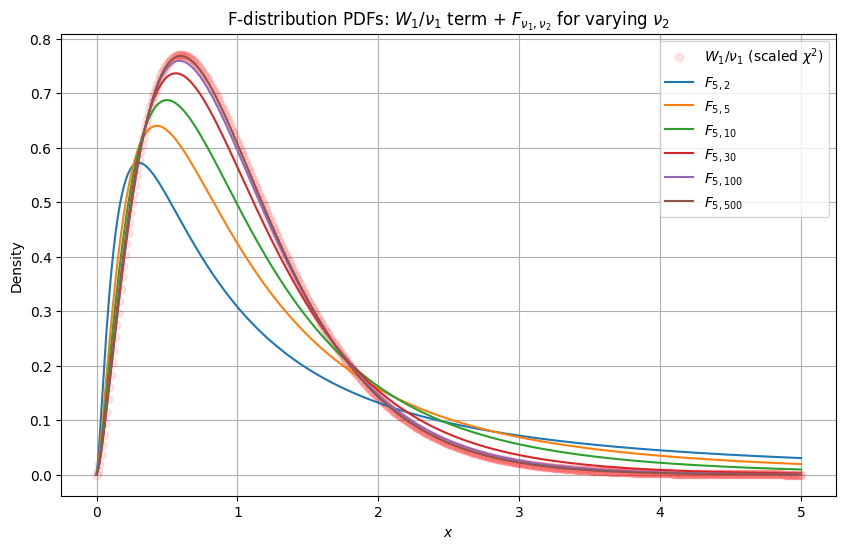

In [161]:
from scipy.stats import f, chi2

# Fixed numerator degrees of freedom
nu1 = 5

# Different denominator degrees of freedom
nu2_values = [2, 5, 10, 30, 100, 500]

x = np.linspace(0, 5, 500)

plt.figure(figsize=(10, 6))

# Scaled chi-square PDF for W1/nu1 term alone plotted as red dots, bigger size, with opacity
scaled_chi_pdf = chi2.pdf(x * nu1, df=nu1) * nu1
plt.plot(x, scaled_chi_pdf, 'o', color='red', markersize=6, alpha=0.1, label=r'$W_1 / \nu_1$ (scaled $\chi^2$)')

for nu2 in nu2_values:
    pdf_vals = f.pdf(x, nu1, nu2)
    plt.plot(x, pdf_vals, label=f'$F_{{{nu1},{nu2}}}$')

    # Calculate average absolute delta to scaled chi-square PDF
    avg_delta = np.mean(np.abs(pdf_vals - scaled_chi_pdf))
    print(f'Average absolute delta between $F_{{{nu1},{nu2}}}$ and scaled $W_1/v_1$: {avg_delta:.4f}')

print("Note how the average spread converges to 0.00 as we increase v_2")

plt.title('F-distribution PDFs: $W_1/\\nu_1$ term + $F_{\\nu_1, \\nu_2}$ for varying $\\nu_2$')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [165]:
print("\nExpected Value and Variance of F_{nu1, nu2} for varying nu2: \n")

for nu2 in nu2_values:
    if nu2 > 4:
        expected_value = nu2 / (nu2 - 2)
        variance = (2 * nu2**2 * (nu1 + nu2 - 2)) / (nu1 * (nu2 - 2)**2 * (nu2 - 4))
        print(f"nu2={nu2}: E[Y] = {expected_value:.4f}, V[Y] = {variance:.4f}")
    elif 2 < nu2 <= 4:
        expected_value = nu2 / (nu2 - 2)
        print(f"nu2={nu2}: E[Y] = {expected_value:.4f}, V[Y] = undefined (variance undefined for nu2 <= 4)")
    else:
        print(f"nu2={nu2}: E[Y] and V[Y] undefined (for nu2 <= 2)")



Expected Value and Variance of F_{nu1, nu2} for varying nu2: 

nu2=2: E[Y] and V[Y] undefined (for nu2 <= 2)
nu2=5: E[Y] = 1.6667, V[Y] = 8.8889
nu2=10: E[Y] = 1.2500, V[Y] = 1.3542
nu2=30: E[Y] = 1.0714, V[Y] = 0.5828
nu2=100: E[Y] = 1.0204, V[Y] = 0.4469
nu2=500: E[Y] = 1.0040, V[Y] = 0.4089


Note that as we increase v_2, F's expected value converges to 1 and it's variance decreases towards $V[F(v1 = 5, v2 = \infty)]$ which is $2/3$

## Exponential

Most commonly used to model time until a particular event occurs. It uses a single parameter, $\beta$, that determines both the mean and the varianve. If $Y$ ~ $Exponential(\beta)$ thanits mean and variance are respectively$$E[Y] = \beta$$ $$V[Y] = \beta^2$$.

**The probability density function (PDF) is:**

$$
f_Y(y) = \frac{1}{\beta} e^{-y/\beta}, \quad y \geq 0
$$

**The cumulative distribution function (CDF) is:**


$$
F_Y(y) = 1 - e^{-y/\beta}, \quad y \geq 0
$$
Reminder that $exp(-y/\beta)$ and $e^{-y/\beta}$ are literally the same thing, just a stylistic difference. 

The exponential distribution is closely related to the Poisson distribution. For example, when modeling loan defaults over a fixed time window $\theta$:

- The number of defaults $Y$ in the window can be modeled as a Poisson random variable with parameter $\lambda$, representing the average default rate during $\theta$:

$$
Y \sim \text{Poisson}(\lambda), \quad \lambda = \text{average defaults per } \theta
$$

- The exponential distribution models the time between *individual* default events, assuming the times between defaults are exponentially distributed and event occurrences follow a Poisson process.

- The parameter $\beta$ of the exponential distribution is calibrated as:

$$
\beta = \frac{1}{\lambda} = \text{average time between events in the window } \theta
$$

- Thus, if we want to model the number of defaults over $\theta$, use the Poisson distribution; to model the waiting time until the next default, use the exponential distribution:

$$
Y \sim \text{Poisson}(\lambda) \quad \text{for counts over } \theta
$$

$$
T \sim \text{Exponential}(\beta) \quad \text{for inter-event times}
$$

This linkage between Poisson and exponential distributions arises because the exponential is the continuous waiting time distribution for Poisson events occurring at


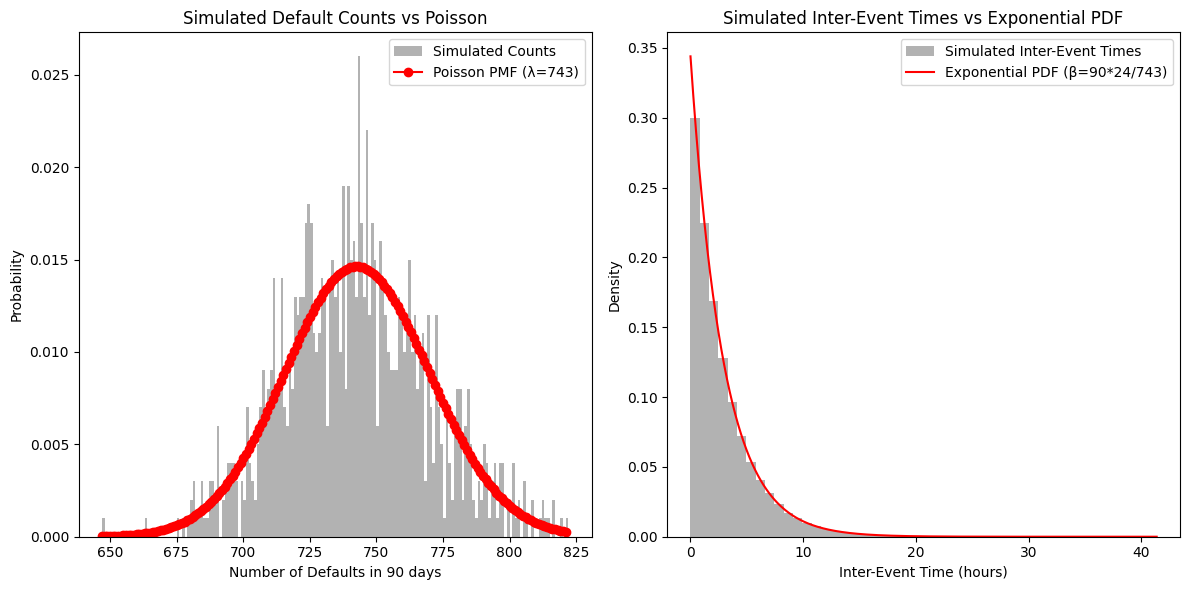

   event_time_hours
0          1.682394
1          7.540277
2         14.087258
3         18.336069
4         21.616255


In [166]:
import pandas as pd
from scipy.stats import poisson, expon

# Parameters
theta_days = 90
theta_hours = theta_days * 24
avg_defaults = 743
num_simulations = 1000

# Containers for results
all_counts = []
all_inter_event_times = []

for _ in range(num_simulations):
    # Simulate number of defaults in the window (Poisson)
    num_defaults = poisson.rvs(avg_defaults)
    all_counts.append(num_defaults)
    
    if num_defaults > 0:
        # Simulate event times as cumulative sums of exponential inter-arrival times
        inter_event_times = expon.rvs(scale=theta_hours / avg_defaults, size=num_defaults)
        event_times = np.cumsum(inter_event_times)
        # Filter events occurring within theta window
        event_times = event_times[event_times <= theta_hours]

        # Collect inter-event times for histogram
        all_inter_event_times.extend(inter_event_times)
        
# Sample DataFrame showing a simulation example (last one)
df_example = pd.DataFrame({'event_time_hours': event_times})

# Plot default counts vs Poisson PMF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(all_counts, bins=range(min(all_counts), max(all_counts) + 2), density=True, alpha=0.6, color='gray', label='Simulated Counts')
x = np.arange(min(all_counts), max(all_counts) + 1)
plt.plot(x, poisson.pmf(x, avg_defaults), 'ro-', label='Poisson PMF (λ=743)')
plt.xlabel('Number of Defaults in 90 days')
plt.ylabel('Probability')
plt.title('Simulated Default Counts vs Poisson')
plt.legend()

# Plot inter-event times vs Exponential PDF
plt.subplot(1, 2, 2)
plt.hist(all_inter_event_times, bins=50, density=True, alpha=0.6, color='gray', label='Simulated Inter-Event Times')
x_vals = np.linspace(0, max(all_inter_event_times), 500)
plt.plot(x_vals, expon.pdf(x_vals, scale=theta_hours / avg_defaults), 'r-', label='Exponential PDF (β=90*24/743)')
plt.xlabel('Inter-Event Time (hours)')
plt.ylabel('Density')
plt.title('Simulated Inter-Event Times vs Exponential PDF')
plt.legend()


plt.tight_layout()
plt.show()

print(df_example.head())

### Theres a passage about Mixtures of Distributions in the material but for now I feel like skipping.
tbc

# Short Concept Questions

## 3.1 What's the name of the distribution that describes any random binary event?

Easy, The Bernoulli, parameterized by p which is the "probability of successful experiment". Pr(success) = p; Pr(not) = Pr(success)^c = 1 - p. It's core idea is mapping an outcome's (event) percieved probability (p) over a viewpoint (Omega) where there are 2 outcomes (events) and they are mutually exclusive, and P(success) + P(not) = 1.00.

## 3.2
